<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# PROYECTO INTEGRADO

# ¿Cuáles son los patrones de éxito?

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

# Objetivo:

Identificar patrones que determinen si un juego tiene éxito o no. Con el propósito de detectar proyectos prometedores y planificar campañas publicitarias.

---

## Abrir y estudiar el archivo de datos

### Inicialización

In [1]:
# Cargar las librerías

import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

### Cargar datos

In [2]:
# Cargar datos
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
# Imprimir información general
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Tenemos 16715 registros con índice de 0 a 16714.
Tmabién se puede apreciar 11 columnas en total.
1. Se debe cambiar el formato de los nombres de columna a formato snake_case.
2. Tenemos Valores ausentes que hay que debemos tratar: 'Year_of_Release', 'Critic_Score, 'User_Score', 'Rating'
3. Covertir tipos de datos de las columnas 'Year_of_Release', 'Critic_Score', 'User_Score'.

In [4]:
# Imprimir una muestra
df_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2532,The Legend of Zelda: Four Swords Adventures,GC,2004.0,Action,0.63,0.16,0.00,0.02,86.0,7.2,E
11824,World Party Games,Wii,2009.0,Misc,0.07,0.00,0.00,0.01,NaN,tbd,E
12033,Dave Mirra BMX Challenge,PSP,2006.0,Sports,0.06,0.00,0.00,0.01,32.0,4.6,E
16020,Powerbike,DS,2009.0,Racing,0.01,0.00,0.00,0.00,NaN,tbd,E
7634,Press Your Luck 2010 Edition,DS,2009.0,Misc,0.18,0.00,0.00,0.01,NaN,tbd,E
549,Pokémon Stadium 2,N64,2000.0,Strategy,1.02,0.36,1.13,0.23,NaN,NaN,NaN
4688,300: March to Glory,PSP,2007.0,Action,0.27,0.08,0.00,0.07,55.0,7.1,M
13157,Metal Max 2 Reloaded,DS,2011.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
950,2 Games in 1: Sonic Advance & ChuChu Rocket!,GBA,2005.0,Misc,1.31,0.49,0.00,0.03,NaN,NaN,NaN
11556,Bleach: Erabareshi Tamashii,PS2,2005.0,Adventure,0.00,0.00,0.08,0.00,NaN,NaN,NaN


En efecto, podemos confirmar la información obtenida con al info(). 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de leer los datos y de hacer una revisión inicial
</div>


## Preparar los datos

Vamos a proceder de la sigueinte manera:

1. Reemplazar los nombres de conlumnas, conviertiéndolas a minúsculas.
2. Conversión de datos.
3. Tratar los valores ausentes.
4. Calcular las ventas totales.

### Reemplazar los nombres de las columnas

Usaremos el método lower para convertir todos los nombres de las columnas en minúsculas.

In [5]:
# Poner los nombres de las columnas en minúsculas.
df_games.columns = df_games.columns.str.lower()
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df_games.sample(90)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11573,Boxing Fever,GBA,2001.0,Sports,0.06,0.02,0.00,0.00,76.0,tbd,E
13803,Deadly Arts,N64,1998.0,Fighting,0.03,0.01,0.00,0.00,NaN,NaN,NaN
7665,Soldier of Fortune: Payback,X360,2007.0,Shooter,0.18,0.00,0.00,0.02,50.0,5.6,M
5634,Ultimate Fighting Championship: Throwdown,PS2,2002.0,Fighting,0.16,0.12,0.00,0.04,68.0,8,T
3477,Tony Hawk's Pro Skater 4,GC,2002.0,Sports,0.45,0.12,0.00,0.02,91.0,8.6,T
...,...,...,...,...,...,...,...,...,...,...,...
16041,Iron Soldier 3,PS,1999.0,Simulation,0.01,0.01,0.00,0.00,NaN,NaN,NaN
13739,Guilty Gear XX Accent Core,Wii,2007.0,Fighting,0.03,0.00,0.00,0.00,75.0,8.4,T
14086,Obscure,XB,2004.0,Adventure,0.03,0.01,0.00,0.00,66.0,8.4,M
8742,Saturn Bomberman,SAT,1996.0,Puzzle,0.00,0.00,0.15,0.00,NaN,NaN,NaN


Los nombres de columna han quedado estandarizadas con el formato snake_case.

### Convertir los datos en los tipos necesarios

Vamos a hacer las correcciones utilizando el método to_numeric() y usaremos el parámetro errors con el argumento 'coerce', para asegurarnos que no haya errores en la conversión.

In [7]:
# Convertimos el tipo de dato de la columna 'year_of_release' aInt64.
df_games['year_of_release'] = pd.to_numeric (df_games['year_of_release'], errors = 'coerce').astype('Int64')

# Ahora las columnas 'critic_sore' y 'user_score'.
df_games['critic_score'] = pd.to_numeric (df_games['critic_score'], errors = 'coerce')

# Para escalar la puntuación y sea sobre 100 punto en ambas columnas.
df_games['user_score'] = df_games['user_score']*10
df_games['user_score'] = pd.to_numeric (df_games['user_score'], errors = 'coerce')

df_games.info()
print(df_games['user_score'].sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       883 non-null    float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
14996             NaN
197               NaN
3544              NaN
16374    8.888889e+09
790      5.555556e+09
Name: user_score, dtype: float64


Ya las columnas señaladas tienen los tipos de datos correctos. Estos cambios garantizan un manejo más eficiente de los datos y que se pueda realizar análisis numéricos.


### Tratar los valores ausentes

In [8]:
# Mostrar los datos asuentes por columna.
print(df_games.isnull().sum())

name                   2
platform               0
year_of_release      269
genre                  2
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8578
user_score         15832
rating              6766
dtype: int64


La columna 'year_of_release' tiene 269 valores ausentes, realmente es muy poco, por lo que eliminaremos los registros que no tienen año.
Las columnas 'critic_score', 'user_score' presentan más del 50% de datos ausentes. La columna 'rating' arriba de un tercio del total de entradas.
Es popsible que la gran cantida de datos ausentes sea porque no hubo evaluación de parte de los críticos ni de los usuarios.

In [9]:
# Eliminar registros sin año: 'year_of_release' .
df_games.dropna(subset=['year_of_release'], inplace=True)
print(df_games['year_of_release'])

# Columna 'critic_score' y 'user_score': asignaremos 0 a los valores ausenres.
df_games['critic_score'] = df_games['critic_score'].fillna(0)
print(df_games['critic_score'])

# Antes de asignar a la columna 'user_score' 0, vamos a cambiar los valores 'tbd' por ausentes.
df_games['user_score'] = df_games['user_score'].replace('tbd',pd.NA)
df_games['user_score'] = df_games['user_score'].fillna(0)
print(df_games['user_score'])

# La columna 'rating': cambiaremos los valors ausentes por 'unknow'
df_games['rating'] = df_games['rating'].fillna('unknow')
print(df_games['rating'])

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: Int64
0        76.0
1         0.0
2        82.0
3        80.0
4         0.0
         ... 
16710     0.0
16711     0.0
16712     0.0
16713     0.0
16714     0.0
Name: critic_score, Length: 16446, dtype: float64
0        8.888889e+09
1        0.000000e+00
2        0.000000e+00
3        8.888889e+09
4        0.000000e+00
             ...     
16710    0.000000e+00
16711    0.000000e+00
16712    0.000000e+00
16713    0.000000e+00
16714    0.000000e+00
Name: user_score, Length: 16446, dtype: float64
0             E
1        unknow
2             E
3             E
4        unknow
          ...  
16710    unknow
16711    unknow
16712    unknow
16713    unknow
16714    unknow
Name: rating, Length: 16446, dtype: object


Valores ausentes:

1. year_of_release: los valores ausentes no se pueden recuperar y la cantidad es realmente baja en comparación del total, por lo que eliminamos las filas que no cuentan con año de lanzamiento.
2. critic_score y user_score: los valores ausentes podrían indicar que el juego no ha sido calificado, de ahí que dejamos ponemo en 0 el valor de la celda.
3. user_score: los valores 'tbd' los reemplazamos por pd.NA ya que significan "to be determined" y no son valores numéricos válidos, por lo dspués de hacer esto pasaremos 0 a cada valor ausente.
4. rating: los valores ausentes los reemplazamos por 'unknown' ya que no podemos asumir una clasificación.

### Calcular las ventas totales

In [10]:
# Crear nueva columna 'total_sales'.
df_games['total_sales'] = df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
print('Total de ventas: na_sales, eu_sales, jp_sales, other_sales')
print(df_games['total_sales'])
print()
print("Total general: ", df_games['total_sales'].sum())

Total de ventas: na_sales, eu_sales, jp_sales, other_sales
0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16446, dtype: float64

Total general:  8816.79


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


## Analizar datos

El sigueinte paso es realizar el análisis de los datos.

1. Juegos por año.
2. Variación de ventas de una plataforma a plataforma.
3. Plataformas líderes.
4. Diagrama de caja de ventas globales.
5. Correlación entre reseñas y ventas.
6. Ventas por género.

### Juegos por año

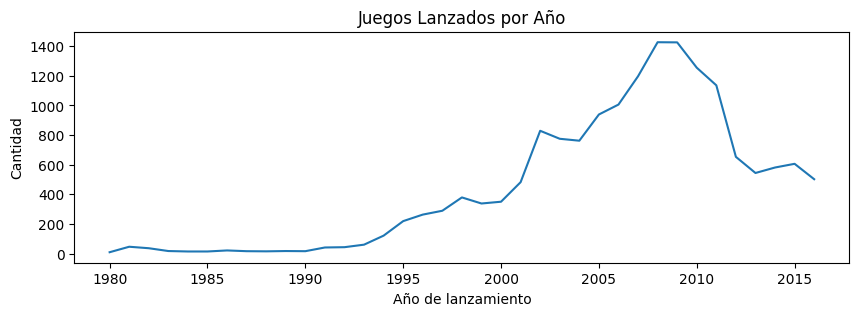

In [11]:
# Vamos a calcular el número de juegos por año y presentar una gráfica.
games_per_year = df_games.groupby('year_of_release')['name'].count()

games_per_year.plot(
    title='Juegos Lanzados por Año', 
    xlabel='Año de lanzamiento', 
    ylabel='Cantidad',
    figsize=(10,3)
)
plt.show()

Las primeras impresiones:
1. Los años en que hubo más lanzamientos de videojuegos fueron: 2008 y 2009.
2. De 1980 a 1994, se lanzaron menos de 200 juegos por año.
3. A partir de 1995 inició un crecimiento significativo en lanzamiento de videosjuegos, llegando a ounto álgido en los años 2008 y 2009.
4. En los años 2010 y 2011 descendió la cantidad de juegos lanzados.
5. De 2012 a 2016 decendieron mucho más el lanzamiento de videojuegos, teniendo el pico más bajo en 2016.

Algunas conclusiones pueden ser:
1. La crciente coompetencia por ganar terreno de las plataformas en el desarrollo y venta de videojuegos, asimismo la innovacion con nuevos videojuegos, esto hizo crecer el númeor de lanzamientos por año de manera significativa.
2. Una vez llegado al punto máximo de lanzamientos alcanzados, inició un declive en la cantidad de lanzamientos por varios motivos: 1. Mayor complejidad en el desarrollo, juegos más avanzados. 2. Transición tecnológica, cambios generacionales en las consolas. 3. Enfoque en la calidad sobre la cantidad. 4. Hubo crecimiento en el mercado digital, por lo que los lanzamientos físicos se vieron afectados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de presentar los datos, podemos ver claramente la tendencia de los videojuegos 
</div>


### Variación de ventas de una plataforma a otra

<AxesSubplot:title={'center':'Ventas por Plataforma'}, xlabel='Plataforma', ylabel='USD'>

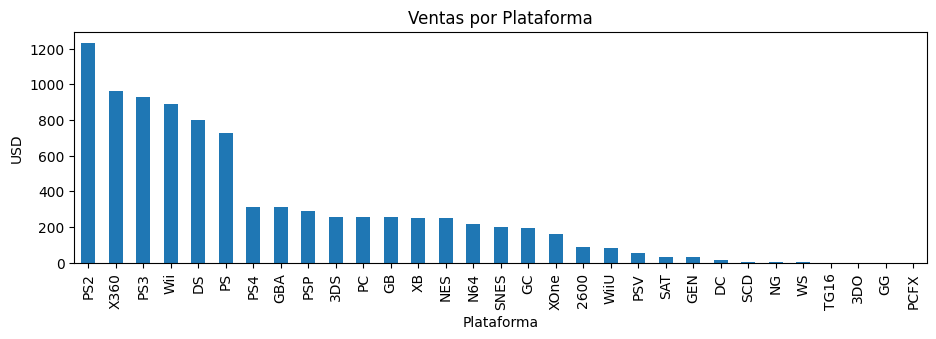

In [12]:
# Ventas por plataforma.
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform_sales.plot(title='Ventas por Plataforma', 
                    xlabel='Plataforma',
                    ylabel='USD',
                    kind='bar', 
                    figsize=(11,3))

Las plataformas con más ventas son seis: PS2, X360, PS3, Wii, DS y PS.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de agrupar y mostrar los datos de forma descendente
</div>


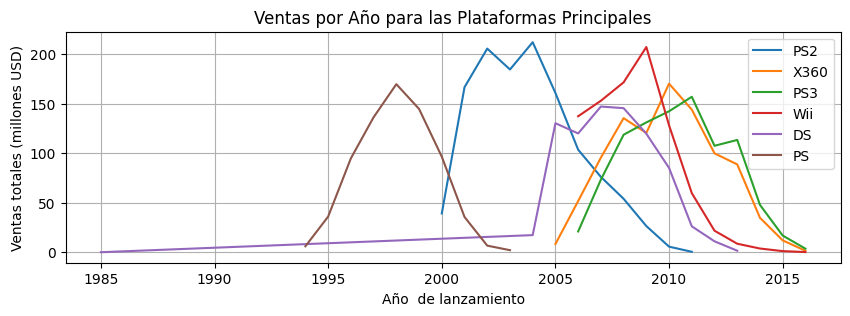

In [13]:
# Las plataformas con las mayores ventas totales.
top_platforms = platform_sales.head(6).index
for platform in top_platforms:
    yearly_sales = df_games[df_games['platform']== platform].groupby('year_of_release')['total_sales'].sum()
    yearly_sales.plot(label=platform, figsize=(10,3))
plt.title('Ventas por Año para las Plataformas Principales')
plt.xlabel('Año  de lanzamiento')
plt.ylabel('Ventas totales (millones USD)')
plt.legend()
plt.grid(True)
plt.show()

Podemos observar lo siguiente:
1. DS tuvo desarrollo de ventas desde 1985 hasta 2012. Teniendo sus ventas más altas entre 2005 y 2009.
2. PS tiene una aparición en 1994, teniendo su punto más álgido de ventas en 1998, a partir de este último ien su declive y sesaparece cerca de 2003.
3. PS2 aparece en 2000. Tiene su índice de ventas más elevado 2002 y 2004. Desaparece de las ventas para 2011.
4. X360 surge en 2005, las ventas más altas fueron entre 2008 y 2010.
5. Wii hace su inauguración en 2006, vende más en el año 2009. Tiene una picada de ventas significativa.
6. PS3 surge en 2006, teniendo una racha de altas ventas de 2008 a 2013, en 2011 tuvo su pico más alto en ventas.

Los videojuegos que llegan a 2015 son tres: Wii(3er lugar), X360(2do lugar) y PS3(1er lugar) con ventas inferiores a 20 millones. Pero definitvamente han cerrado el año 2015 con ventas muy bajas respecto a sus ventas más altas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Podemos observar como en los últimos años la separación entre consolas cada vez es menor
</div>


           min   max
platform            
2600      1980  1989
3DO       1994  1995
3DS       2011  2016
DC        1998  2008
DS        1985  2013
GB        1988  2001
GBA       2000  2007
GC        2001  2007
GEN       1990  1994
GG        1992  1992
N64       1996  2002
NES       1983  1994
NG        1993  1996
PC        1985  2016
PCFX      1996  1996
PS        1994  2003
PS2       2000  2011
PS3       2006  2016
PS4       2013  2016
PSP       2004  2015
PSV       2011  2016
SAT       1994  1999
SCD       1993  1994
SNES      1990  1999
TG16      1995  1995
WS        1999  2001
Wii       2006  2016
WiiU      2012  2016
X360      2005  2016
XB        2000  2008
XOne      2013  2016


<function matplotlib.pyplot.show(close=None, block=None)>

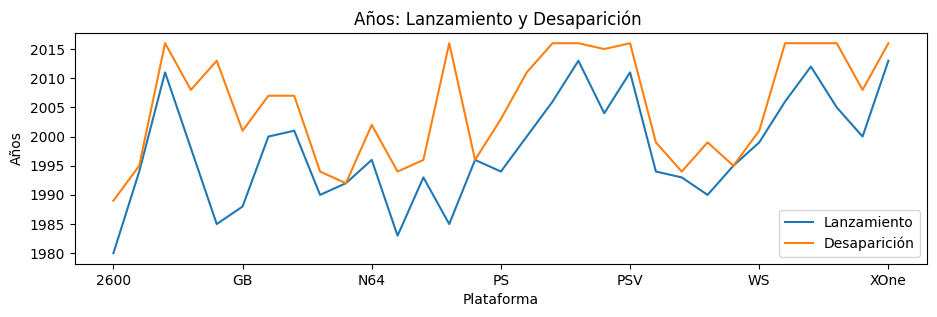

In [14]:
# Plataformas año en surgen y año en que desaparecen.
platforms_disappear = df_games.groupby('platform')['year_of_release'].agg(['min','max'])

print(platforms_disappear)

platforms_disappear.plot(title='Años: Lanzamiento y Desaparición ', 
                         xlabel='Plataforma', 
                         ylabel='Años', figsize=(11,3))
plt.legend(['Lanzamiento','Desaparición'])
plt.show

           min   max  years_of_life
platform                           
2600      1980  1989              9
3DO       1994  1995              1
3DS       2011  2016              5
DC        1998  2008             10
DS        1985  2013             28
GB        1988  2001             13
GBA       2000  2007              7
GC        2001  2007              6
GEN       1990  1994              4
GG        1992  1992              0
N64       1996  2002              6
NES       1983  1994             11
NG        1993  1996              3
PC        1985  2016             31
PCFX      1996  1996              0
PS        1994  2003              9
PS2       2000  2011             11
PS3       2006  2016             10
PS4       2013  2016              3
PSP       2004  2015             11
PSV       2011  2016              5
SAT       1994  1999              5
SCD       1993  1994              1
SNES      1990  1999              9
TG16      1995  1995              0
WS        1999  2001        

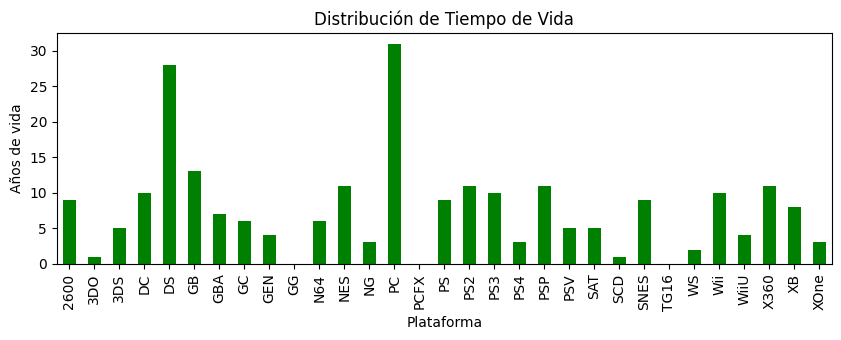

7.612903225806452


In [15]:
# Tiempo de vida de las plataformas
platforms_disappear['years_of_life'] = platforms_disappear['max'] - platforms_disappear['min']
print(platforms_disappear)

platforms_disappear['years_of_life'].plot(
    title='Distribución de Tiempo de Vida',
    xlabel='Plataforma',
    ylabel='Años de vida',
    color='green', 
    figsize=(10,3),
    kind='bar')

plt.show()

print(platforms_disappear['years_of_life'].mean())

Las plataformas tienen una media de 7.6 años. La mayoría de las plataformas oscila entre 5 y 10 años.

Podemos concluir que las plataformas con mayor venta son las más populares. Esto indica hacia donde el mercado ha ido apuntando, por lo que tambié es posible que los esfuerzos en desarrollar las plataformas exitosas sea mayor: recursos económicos, tecnológicos y de desarrollo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Es interesante la grafica ya que nos da una idea clara del tiempo de vida de cada una de las consolas y es fácil hacer la comparación contra sus similares
</div>


### Determinar período en elque se debe basar un modelo para 2017

In [16]:
# Asignar el período a un nuevo DataFrame 'relevant_games'
year_begin = 2013
relevant_games = df_games[df_games['year_of_release'] >= year_begin].copy()
relevant_games.sample(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2815,LEGO Dimensions,PS4,2015,Action,0.24,0.37,0.00,0.12,80.0,0.0,E10+,0.73
2955,Plants vs. Zombies: Garden Warfare,XOne,2014,Shooter,0.39,0.23,0.00,0.06,76.0,0.0,E10+,0.68
4879,Saints Row IV,PS4,2015,Action,0.13,0.18,0.03,0.06,0.0,0.0,unknow,0.40
6955,NBA Live 15,PS4,2014,Sports,0.16,0.04,0.00,0.04,59.0,0.0,E,0.24
9237,Battlefield: Hardline,PC,2015,Shooter,0.00,0.13,0.00,0.01,71.0,0.0,M,0.14
10824,The Voice,WiiU,2014,Action,0.08,0.00,0.00,0.01,0.0,0.0,unknow,0.09
15352,Rugby League Team Manager 2015,PC,2015,Action,0.00,0.02,0.00,0.00,0.0,0.0,unknow,0.02


### Líderes en ventas 

In [17]:
# Plataformas líderes.
relevant_platform_sales = relevant_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(relevant_platform_sales)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


¿Qué plataformas son líderes en ventas? Las plataformas líderes son: PS4, PS3, XOne, 3DS y X360.
¿Cuáles crecen y cuáles se reducen? 
Elige varias plataformas potencialmente rentables.

### Diagrama de caja

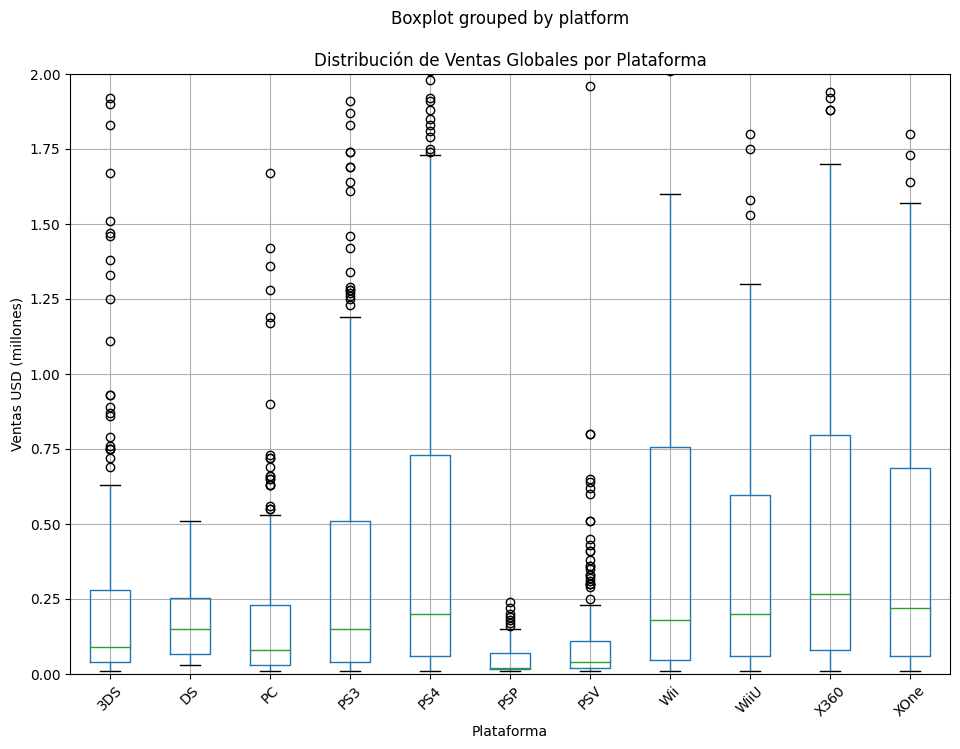

In [18]:
# Diagrama de caja para las ventas de todos los juegos.

relevant_games.boxplot(column='total_sales', by='platform', figsize=(11,8))
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas USD (millones)')
plt.xticks(rotation=45)
plt.grid=True
plt.ylim([0,2])
plt.show()


1. Son significativas las diferencias en las ventas. 
¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

El diagrama de caja nos muestra como en algunas consolas las ventas estan consolidadas mientras que en otras consolas las ventas son muy disparejas lo que incrementa el rango intercuartil
</div>


### Reseñas de usuarios y profesionales

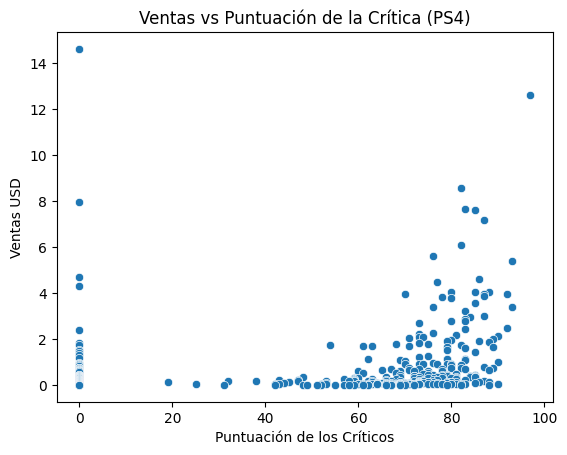

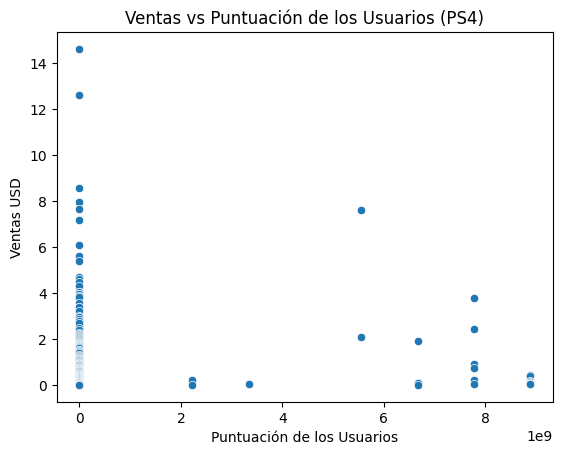

In [20]:
# Plataforma PS4.
pop_platform = 'PS4'
ps4_platform = relevant_games[relevant_games['platform'] == pop_platform]

# Gráficos de dispersión.
sns.scatterplot(x='critic_score',y='total_sales',data=ps4_platform)
plt.title('Ventas vs Puntuación de la Crítica (PS4)')
plt.xlabel('Puntuación de los Críticos')
plt.ylabel('Ventas USD')
plt.show()

sns.scatterplot(x='user_score', y='total_sales', data=ps4_platform)
plt.title('Ventas vs Puntuación de los Usuarios (PS4)')
plt.xlabel('Puntuación de los Usuarios')
plt.ylabel('Ventas USD')

plt.show()

In [21]:
# Correlación
print(ps4_platform[['critic_score','user_score','total_sales']].corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.170752     0.227550
user_score        0.170752    1.000000     0.004541
total_sales       0.227550    0.004541     1.000000


Existe una correlación positiva entre las ventas totales y ambas puntuaciones. 
1. La relación de la crítica con las ventas generadas, tiene una correlación positiva débil. Lo que nos inica que las ventas tienen un leve crecimiento o incremento a causa de la valoración de los críticos, aunque no se puede presumir, pues la relación no es lo suficientemente fuerte.
2. La correlación user_score y total_sales es casi nula. Lo que nos hace inferir que la valoración de los usuarios no tiene un impacto importante en el vooumen de ventas.

Las opiniones d elos críticos produce una ligera influencia en las ventas. Por otro lado, las opiniones de los usuarios no tiene relevancia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Las observaciones que haces me parecen acertadas
</div>


### Distribución por género

In [22]:
# Examinar la distribución de los juegos por género.
genre_games = relevant_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_games)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


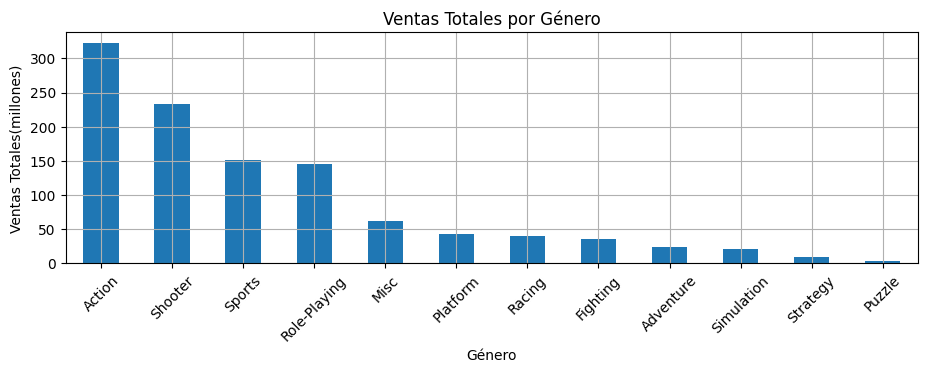

In [23]:
# Describir los géneros más rentables y generalizar sobre los géneros con ventas altas y bajas.
genre_games.plot(kind='bar', 
                 title='Ventas Totales por Género',
                 xlabel='Género',
                 ylabel='Ventas Totales(millones)',
                 grid=True,
                 figsize=(11,3)
                )
plt.xticks(rotation=45)
plt.show()

1. Realmente hay cuatro generos más rentables son: Action, Shooter, Sports y Role-Playing. Debido a que saus ventas superan exponencialmente a el resto de géneros. 

Esto puede apuntar a que, en los géneros Action y Shooter, muchos usuarios prefieren este tipo de juegos por la experiencia dinñamica, intensas y atractivas visualmente. 

Por otro lado, los géneros Spors y Rol-Playing, apelan respectivamente a un realismo en competencias deportivas y a una narrativa compleja.

2. Los géneros: Misc, Platform, Racing, Fighting, Adventure, Simulation, Strategy, Puzzle. De este grupo de géneros, podemos observar que Misc es el más alto en ventas y Puzzle el más bajo.

Lo que podemos observar es que aunque estos génros no aportan tanto como los primeros más vendidos, tienen cierta consistencia que podría ser explotada para una mejor comecialización.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Buena manera de presentar los datos, las observaciones que haces me parecen buenas también
</div>


## Crear un perfil para cada región (NA, UE, JP)

### Plataformas principales

In [24]:
# Determinar las cinco plataformas principales para cada región.
#Función para crear nuevos DF
def top_platforms(data, region_one):
    top_platform = data.groupby('platform')[region_one].sum().sort_values(ascending=False).head(5)
    return top_platform
#Función para imprimir
def write(data,region):
    print(f'\nLas top 5 de plataformas en {region}')
    print(data)

# Norteamérica (NA)
na_platforms_5 = top_platforms(relevant_games,'na_sales')
write(na_platforms_5,'Norteamérica')

# Europa (EU)
eu_platforms_5 = top_platforms(relevant_games,'eu_sales')
write(eu_platforms_5,'Europa')

# Japón (JP)
jp_platforms_5 = top_platforms(relevant_games,'jp_sales')
write(jp_platforms_5,'Japón')


Las top 5 de plataformas en Norteamérica
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Las top 5 de plataformas en Europa
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

Las top 5 de plataformas en Japón
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


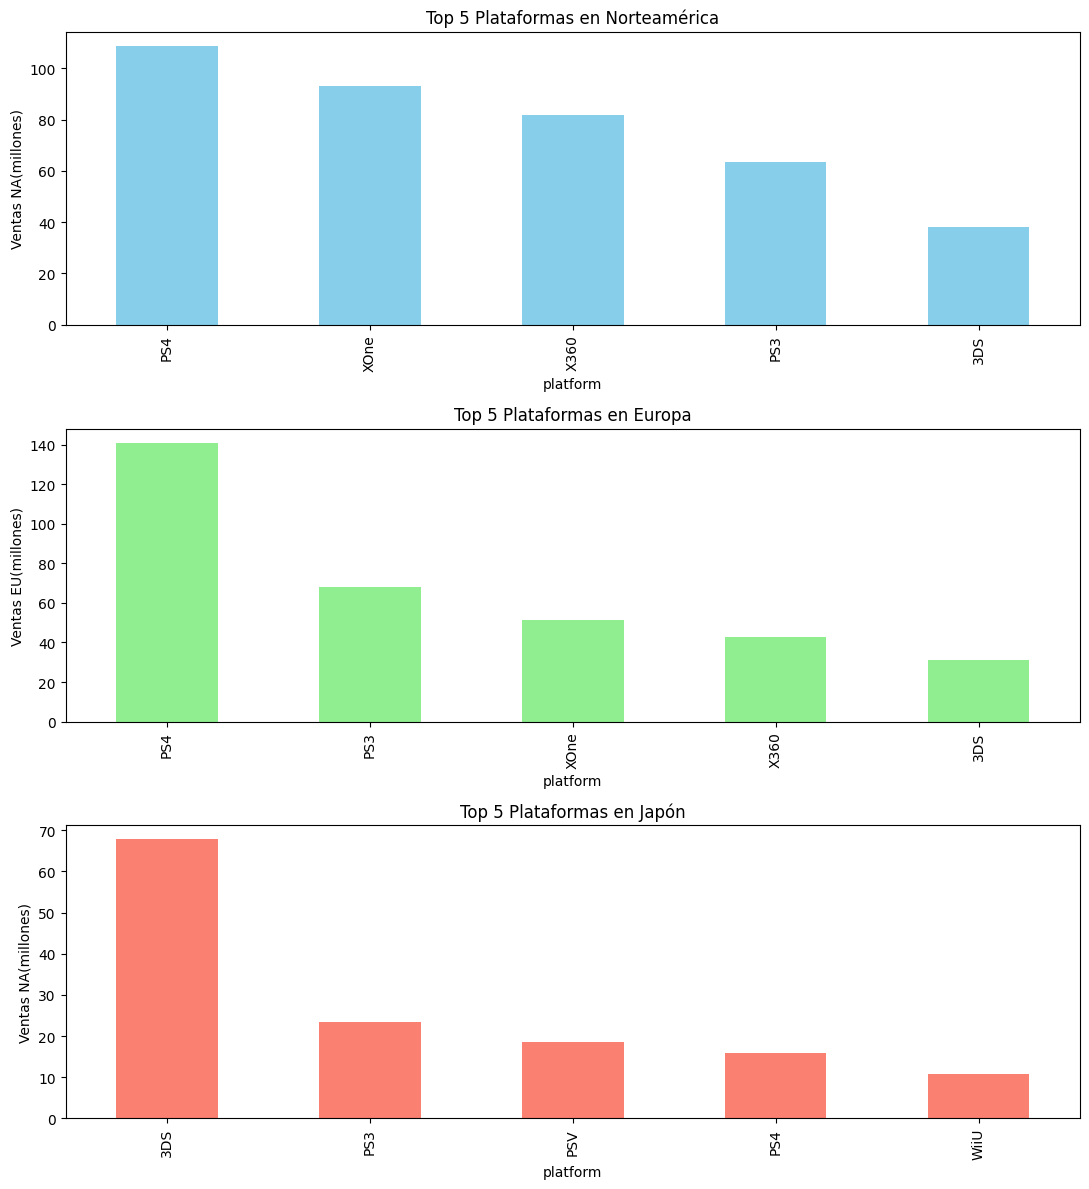

In [25]:
# Gráficos para describir las variaciones en sus cuotas de mercado de una región a otra.
plt.figure(figsize=(11,12))

# Norteamérica
plt.subplot(3,1,1)
na_platforms_5.plot(kind='bar', 
                    color='skyblue',
                    title='Top 5 Plataformas en Norteamérica',
                    ylabel='Ventas NA(millones)'
                   )

# Europa
plt.subplot(3,1,2)
eu_platforms_5.plot(kind='bar', 
                    color='lightgreen',
                    title='Top 5 Plataformas en Europa',
                    ylabel='Ventas EU(millones)'
                   )

# Japón
plt.subplot(3,1,3)
jp_platforms_5.plot(kind='bar', 
                    color='salmon',
                    title='Top 5 Plataformas en Japón',
                    ylabel='Ventas NA(millones)'
                   )

plt.tight_layout()
plt.show()

1. Norteamérica: PS4 es es líder en las ventas con 108.74 millones. Las plataformas de Xbox tiene una presencia intensa con un total juntas de más de 170 millones. 3DS se mantiene considerablemente en el mercado.

2. Europa: PS4 definitvamente va a la cabeza en venta de la región, con 141.09 millones superando a NA. Se puede notar que esta región tiene una gran inclinación por las consolas PlayStation, como se uede observar por las ventas de PS3 con 67.81 millones. Xbox está presente, pero sus ventas son menores que Norteamérica.

3. Japón: 3DS es definitivamente la que lidera en Japón con 67.81 millones, esto refleja la preferencia por las consilas portátles y juegos típicos de esta región. PS3 y PS4 tienen un buen margen de ventas, pero no se compara con 3DS. También podemos apreciar que PSV y WiiU tienen una mayor preferencia que Norteamérica y Europa.

Es claro que las preferencias de los usuarios por las plataformas varía de acuerdo a la región, asimismo sus influencias culturales, estilo de juego y, dsde luego, la mercadotecnia aplicada a estas plataformas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!

Esta grafica nos cuenta cosas muy interesantes, Europa y Norteamerica con comportamientos algo similares mientras que Japón con una tendencia diferente en las ventas
</div>


### Géneros principales

In [26]:
# Determinar los cinco géneros principales.
#Función para crear nuevos DF
def top_genres(data, region_one):
    top_genre = data.groupby('genre')[region_one].sum().sort_values(ascending=False).head(5)
    return top_genre
#Función para imprimir
def write(data,region):
    print(f'\nLos top 5 de géneros en {region}')
    print(data)

# Norteamérica
na_top_genres = top_genres(relevant_games,'na_sales')
write(na_top_genres,'Norteamérica')

# Europa
eu_top_genres = top_genres(relevant_games,'eu_sales')
write(eu_top_genres,'Europa')

# Japón
jp_top_genres = top_genres(relevant_games,'jp_sales')
write(jp_top_genres,'Japón')




Los top 5 de géneros en Norteamérica
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Los top 5 de géneros en Europa
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Los top 5 de géneros en Japón
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


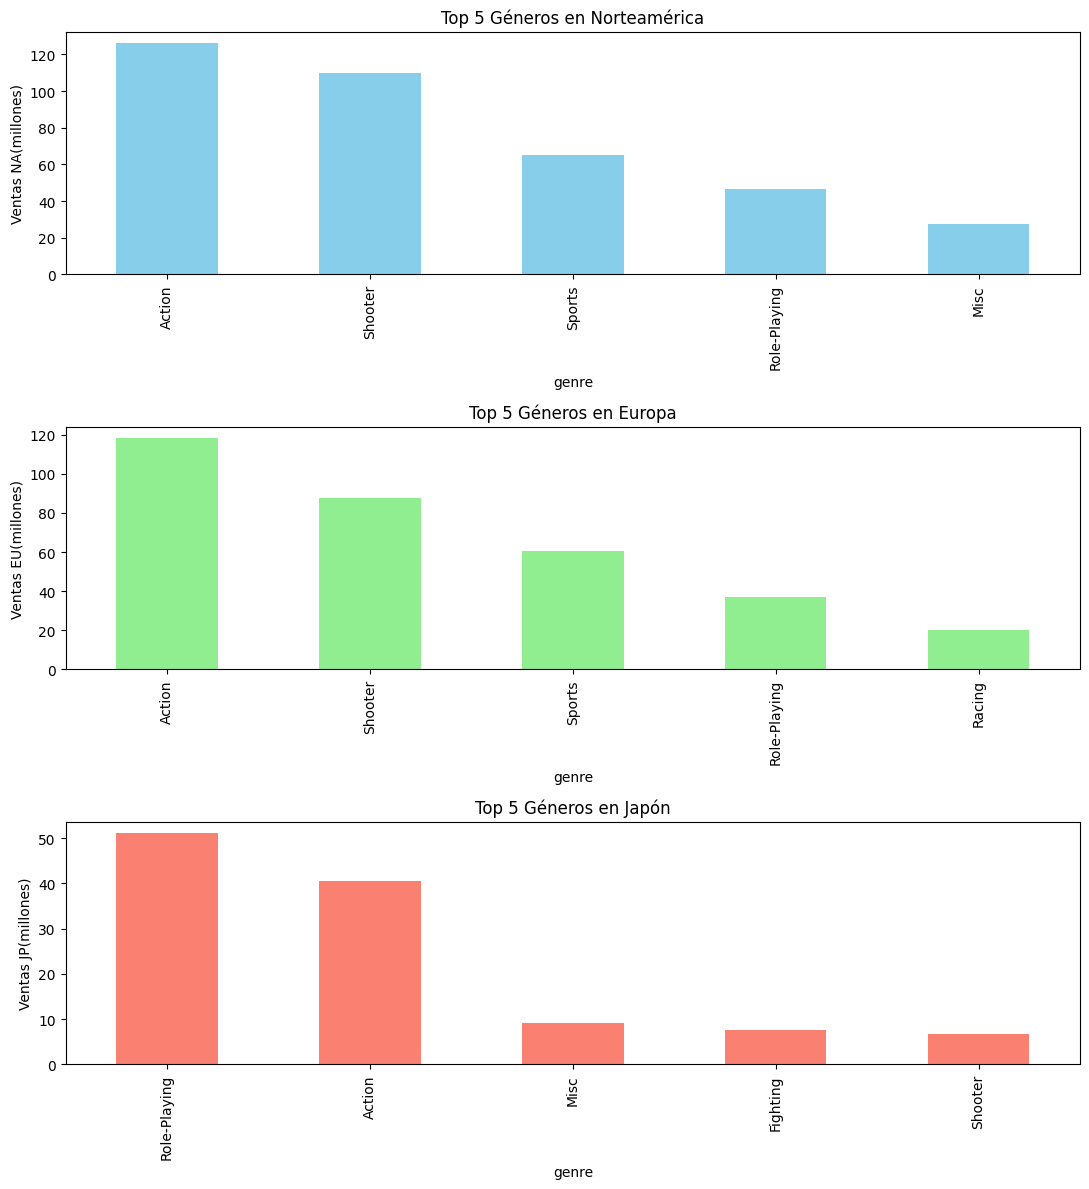

In [27]:
# Visualización de los 5 génros más populares por región.
plt.figure(figsize=(11,12))

plt.subplot(3,1,1)
na_top_genres.plot(kind='bar', 
                   color='skyblue',
                   title='Top 5 Géneros en Norteamérica',
                   ylabel='Ventas NA(millones)'
                   )

plt.subplot(3,1,2)
eu_top_genres.plot(kind='bar',
                   color='lightgreen',
                   title='Top 5 Géneros en Europa',
                   ylabel='Ventas EU(millones)'
                  )

plt.subplot(3,1,3)
jp_top_genres.plot(kind='bar',
                   color='salmon',
                   title='Top 5 Géneros en Japón',
                   ylabel='Ventas JP(millones)'
                  )

plt.tight_layout()
plt.show()

1. Norteamérica: Acción domina el mercado con 126.05 millones. Shooter tiene el segundo lugar con 109.74 milloes. Deportes está en tercer lugar con 65.27 millones. Role-Playing con 46.40 millones. Misc con 27.49 millones.

2. Europa: Acción con 118.13 millones va a la cabeza. Shooter como en América tiene el segundo lugar con 87.86 millones. Deportes está en tercer lugar con un total de 60.52 millones. Role-Playing tuvo una venta de 36.97 millones. Racing con 20.19 millones.

3. Japón: Role-Plaing es el género más preferido con 51.04 millones en ventas. Acción pasa en esta región a segundo lugar con 40.49 millones. Misc con 9.20 millones y Fighting con 7.65 tienen posiciones considerables. Shooter con 6.61 millones tiene una aceptación mucho menor en Japón que en Norteamérica y Europa.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

Una vez más el mercado japones marcando una tendencia única
</div>


### Clasificaciones de ESRB

Determinar si las clasificaciones de ESRB afectan en las ventas a regiones individuales.

In [28]:
# Ventas acumuladas por rating, ESRB.

def rating_sales(data,region): # Función para crear DF por región.
    r_sales = data.groupby('rating')[region].sum().sort_values(ascending=False)
    return r_sales
def write_rs(data, region):
    print(f'\nVenas por Rating en {region}')
    print(data)
    
# Norteamérica
na_rating_sales = rating_sales(relevant_games,'na_sales')
write_rs(na_rating_sales,'Norteamérica')

# Europa
eu_rating_sales = rating_sales(relevant_games,'eu_sales')
write_rs(eu_rating_sales,'Europa')

# Japón
jp_rating_sales= rating_sales(relevant_games,'jp_sales')
write_rs(jp_rating_sales,'Japón')


Venas por Rating en Norteamérica
rating
M         165.21
unknow     89.42
E          79.05
E10+       54.24
T          49.79
Name: na_sales, dtype: float64

Venas por Rating en Europa
rating
M         145.32
E          83.36
unknow     78.91
E10+       42.69
T          41.95
Name: eu_sales, dtype: float64

Venas por Rating en Japón
rating
unknow    85.05
T         20.59
E         15.14
M         14.11
E10+       5.89
Name: jp_sales, dtype: float64


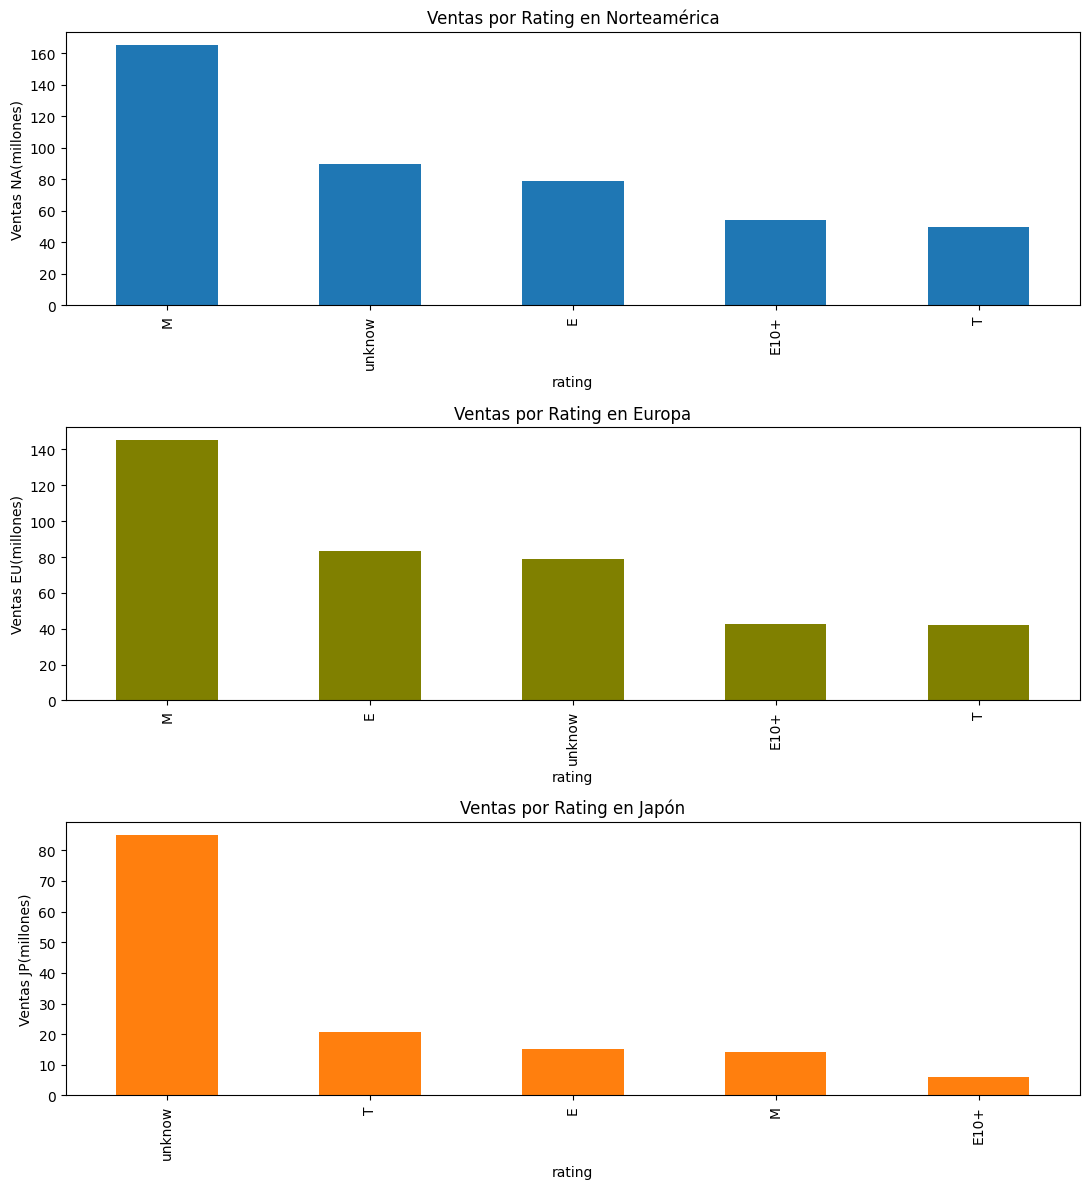

In [29]:
# Visualización mediante gráficos de barra.
plt.figure(figsize=(11,12))

# Norteamérica
plt.subplot(3,1,1)
na_rating_sales.plot(kind='bar',
                     color='tab:blue',
                     title='Ventas por Rating en Norteamérica',
                     ylabel='Ventas NA(millones)'
                    )

# Europa
plt.subplot(3,1,2)
eu_rating_sales.plot(kind='bar',
                     color='olive',
                     title='Ventas por Rating en Europa',
                     ylabel='Ventas EU(millones)'
                    )

# Japón
plt.subplot(3,1,3)
jp_rating_sales.plot(kind='bar',
                     color='tab:orange',
                     title='Ventas por Rating en Japón',
                     ylabel='Ventas JP(millones)'
                    )
plt.tight_layout()
plt.show()

1. Norteamérica: El rating M(Mature) encabeza el mercado con 165.21 millones, lo que muestra preferencia por lo juegos para adultos. E(Everyone) tiene 79.05 millones que es significativo. Unknow tiene en las tres regiones valores considerables, en NA con 89.42 millones, pero sugiere que estos juegos no tiene una clasificación.

2. Europa: M domina con 145.32 millones. E con 83.36 millones. Unknow con 78.91 millones.

3. Los jueos sin una clasificación lideran con 85.05 millones, se puede apuntar a uegos locales. T(Teen) y E(Everyone) tienen un presencia significativa. Por último M es de menor popularidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Las observaciones que haces me parecen acertadas
</div>


## Prueba de hipótesis

### Hipótesis a probar

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Valor de alfa: 0.05


In [30]:
# Xbox One vs PC.

# H₀ (Hipótesis nula): Las calificaciones promedio de los usuarios en Xbox One y PC son las mismas.
# H₁ (Hipótesis alternativa): Las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.

print('H₀ (Hipótesis nula): Las calificaciones promedio de los usuarios en Xbox One y PC son las mismas.')
print('H₁ (Hipótesis alternativa): Las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.\n')

# Establecemos valor alpha = 0.05.
alpha = 0.05
print(f'Valor alpha: {alpha}\n')

# Filtrar datos para cada plataforma.
xbox_scores = relevant_games[relevant_games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = relevant_games[relevant_games['platform'] == 'PC']['user_score'].dropna()

# Realizamos una prueba t de muestras independientes para comparar las medias.
results_xbox_pc = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

# Imprimir resultados
print('Prueba de hipótesis: puntuación de usuarios: Xbox One vs PC')
print('Valor P: ', results_xbox_pc.pvalue)

# Evaluar la hipótesis nula.
if results_xbox_pc.pvalue < alpha:
    print('Rechazamos la hipótesis, hay diferencias significativas en las puntuaciones.')
else:
    print('No podemos rechazar la hipótesis, no hay diferencias importantes.')

H₀ (Hipótesis nula): Las calificaciones promedio de los usuarios en Xbox One y PC son las mismas.
H₁ (Hipótesis alternativa): Las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.

Valor alpha: 0.05

Prueba de hipótesis: puntuación de usuarios: Xbox One vs PC
Valor P:  0.6080704644624249
No podemos rechazar la hipótesis, no hay diferencias importantes.


In [31]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Hipótesis
# H₀ (Hipótesis nula): Las calificaciones promedio de usuario para los géneros Accion y Deportes son las mismas.
# H₁ (Hipótesis alternativa): Las calificaciones promedio de usuario para los géneros Accion y Deportes son diferentes.
print('H₀ (Hipótesis nula): Las calificaciones promedio de usuario para los géneros Accion y Deportes son iguales.')
print('# H₁ (Hipótesis alternativa): Las calificaciones promedio de usuario para los géneros Accion y Deportes son diferentes.')
print(f'Valor alpha: {alpha}\n')

# Filtrar los datos.
action_scores = relevant_games[relevant_games['genre'] == 'Action']['user_score'].dropna()
sports_scores = relevant_games[relevant_games['genre']== 'Sports']['user_score'].dropna()

# Realizamos la prueba t.
results_genres = st.ttest_ind(action_scores, sports_scores, equal_var=False)

# Imprimir resultados.
print("Prueba de hipótesis: Calificaciones de Usuario - Géneros Acción vs Deportes")
print("Valor p:", results_genres.pvalue)
if results_genres.pvalue < alpha:
    print("Resultado: Se rechaza la hipótesis nula. Las calificaciones de usuario para Acción y Deportes difieren significativamente.")
else:
    print("Resultado: No podemos rechazar la hipótesis nula. No hay diferencias significativas.")


H₀ (Hipótesis nula): Las calificaciones promedio de usuario para los géneros Accion y Deportes son iguales.
# H₁ (Hipótesis alternativa): Las calificaciones promedio de usuario para los géneros Accion y Deportes son diferentes.
Valor alpha: 0.05

Prueba de hipótesis: Calificaciones de Usuario - Géneros Acción vs Deportes
Valor p: 0.23396407244942305
Resultado: No podemos rechazar la hipótesis nula. No hay diferencias significativas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamient de la hipotesis me parece correcto en ambos casos, bien hecho!
</div>


Explica cómo formulaste las hipótesis nula y alternativa.
Explica qué criterio utilizaste para probar las hipótesis y por qué.

1. Configuración del Nivel Alfa:

Definimos alpha = 0.05 como nuestro umbral de significancia. Esto significa que estamos dispuestos a aceptar un 5% de probabilidad de rechazar incorrectamente la hipótesis nula.

2. Hipótesis 1: Xbox One vs. PC:

- Preparamos los datos: Filtramos el DataFrame para obtener las calificaciones de los usuarios para Xbox One y PC, excluyendo los valores nulos(sólo como una medida para evitar errores).
- Realizamos la prueba t de Student: Usamos st.ttest_ind() para comparar las medias de los dos grupos. equal_var=False se usa porque no podemos asumir que las varianzas de los dos grupos son iguales:

Para plataformas Xbox One y PC: La hipótesis nula (H₀) propone que no existe diferencia en el puntaje medio de user_score entre ambas plataformas; la alternativa (H₁) sostiene que sí existe diferencia.

Para géneros Acción y Deportes: H₀ plantea que la media de los puntajes de usuario es la misma para ambos géneros, mientras que H₁ indica una diferencia.
- Imprimimos el valor p: El valor p nos dice la probabilidad de obtener los resultados observados si la hipótesis nula fuera cierta.
- Decidimos si rechazamos la hipótesis nula: Si el valor p es menor que alfa, rechazamos la hipótesis nula y concluimos que hay una diferencia significativa.

3. Hipótesis 2: Acción vs. Deportes:

Repetimos los mismos pasos que en la Hipótesis 1, pero para los géneros de Acción y Deportes.


# Conclusión generala

1. Los resultados nos han mostrado que la evolución en los ciclos de vida de las plataformas de videojuegos que algunas se prolongan y otras tienen una duración muy corta.
2. Las platafomas líderes, la segmentación regional y las clasificaciones ESRB resaltan la importcia de innovación en mercadotecnia que tomen en cuenta el mercado y la culura de cada región.
3. La correlación entre la puntuación de los críticos y los usuarios es realmente baja. Las ventas totales tienen mayor influencia de otros factores, que no podemos ver en este proyecto, pero que se debe tener encuenta.
4. Las pruebas de las hipñotesis nos permiten observar que las puntuaciones de los usuarios no tienen relevancia suficiente como ser tomadas en cuenta a la hora de construir un modelo de predicción para 2017.

Lo que nos lleva a pensar que hay que tomar en cuenta dos factores:

Plataformas líderes y condiciones culturales por región.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
